In [1]:
#from neuron import h, gui  # Standard "import" of the NEURON library into Python...
import matplotlib.pyplot as plt
import statistics 
import numpy as np
import seaborn as sns   # Activation of a NEURON library, to fine control the simulation...

In [2]:
from neuron import h, gui
h.load_file('stdrun.hoc')

1.0

### Neuron model

In [3]:
soma = h.Section(name='soma')
soma.cm = 0.5
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=0.5}
}


1.0

In [4]:
axon=h.Section(name='axon')
axon.nseg=100
axon.Ra=123
axon.L=200
axon.diam=2
axon.cm=0.5

In [4]:
for sec in h.allsec():
    sec.insert('WBCN')
    sec.insert('ChR2')
    print(sec)

soma


In [5]:
tot=30000
n=0
#intensity=I(1488)
freq=25 ### Hz
int_time=1000/freq
for seg in soma:
    print(seg)
    seg.ChR2.wavelength=470 
    seg.ChR2.pulse_width=0.85 #2
    seg.ChR2.light_delay=int_time
    seg.ChR2.n=int(tot/seg.ChR2.light_delay)
    seg.ChR2.light_intensity=20 #4.4
    #seg.ChR2.light_intensity=intensity.Light_irradiance(0,1)
    n=int(seg.ChR2.n)
    seg.WBCN.NK*=0.1
    seg.WBCN.NNa*=0.1

soma(0.5)


In [13]:
dx=axon.L/axon.nseg
i=0
freq=35
#intensity_axon=I(552000000)
for seg in axon:
    #print(seg)
    seg.WBCN.NK*=0.1
    seg.WBCN.NNa*=0.1
    seg.ChR2.wavelength=470
    seg.ChR2.pulse_width=1.87
    seg.ChR2.light_delay=freq
    seg.ChR2.n=int(tot/seg.ChR2.light_delay)
    #seg.ChR2.light_intensity=intensity.Light_irradiance(abs(0-dx*i),1)
    #print(seg.ChR2.light_intensity)
    seg.ChR2.light_intensity=5
    i+=1
#axon(0.005).WBCN.NNa*=100
#axon(0.005).WBCN.NK*=100

In [6]:
#axon.connect(soma,1)
#h.topology()
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=0.5}
	insert WBCN { se_WBCN=-1 gnabar_WBCN=0.08 gkbar_WBCN=0.036 gl_WBCN=0.0003 el_WBCN=-54.3 NNa_WBCN=600 NK_WBCN=180}
	insert na_ion { ena=50}
	insert k_ion { ek=-77}
	insert ChR2 { n_ChR2=750 gmax_ChR2=0.4 light_delay_ChR2=40 pulse_width_ChR2=0.85 light_intensity_ChR2=20 Irradiance_ChR2=0 wavelength_ChR2=470}
}


1.0

### Recording parameters & simulation

In [6]:
h.dt=0.01
v_vec = h.Vector()             # Membrane potential vector is created here
t_vec = h.Vector()             # Time stamp vector is created here

'''m_som = h.Vector()             # Open Na gate variable vector is created here
h_som = h.Vector()             # Inactivation gate variable vector is created here
n_som = h.Vector()             # Open K gate variable vector is created here
O1_som=h.Vector()
s_som = h.Vector() 
O2_som=h.Vector()
C1_som=h.Vector()'''
'''
v_vec_AIS = h.Vector()             # Membrane potential vector is created here
v_vec_axEnd = h.Vector() 
v_vec_ax1 = h.Vector() 
v_vec_ax2 = h.Vector() 
v_vec_axM = h.Vector()
v_vec_ax3 = h.Vector() 
v_vec_ax4 = h.Vector() 

'''

'''s_som.record(soma(0.5).WBCN._ref_s)
m_som.record(soma(0.5).WBCN._ref_m) # The appropriate state-variable is linked to the vector
h_som.record(soma(0.5).WBCN._ref_h) # The appropriate state-variable is linked to the vector
n_som.record(soma(0.5).WBCN._ref_n) # The appropriate state-variable is linked to the vector
O1_som.record(soma(0.5).ChR2._ref_O1) # The appropriate state-variable is linked to the vector
O2_som.record(soma(0.5).ChR2._ref_O2) # The appropriate state-variable is linked to the vector
C1_som.record(soma(0.5).ChR2._ref_C1)''' # The appropriate state-variable is linked to the vector

v_vec.record(soma(0.5)._ref_v) # The voltage of the soma section is linked to the vector v_vec
t_vec.record(h._ref_t)         # The absolute time of the simulation is linked to the vector t_vec
'''
v_vec_AIS.record(axon(0.005)._ref_v)
v_vec_ax1.record(axon(0.20500000000000004)._ref_v)
v_vec_ax2.record(axon(0.4050000000000002)._ref_v)
v_vec_axM.record(axon(0.5050000000000002)._ref_v)
v_vec_ax3.record(axon(0.6050000000000003)._ref_v)
v_vec_ax4.record(axon(0.8050000000000005)._ref_v)
v_vec_axEnd.record(axon(0.9950000000000007)._ref_v)
'''
h.v_init = -60                # Let's set the initial condition of the membrane potential

h.t     =   0.0               # Let's reset the initial time of the simulation to 0 ms
h.tstop = float(tot)
h.run()

Changed dt


0.0

violet = 400 nm

indigo = 470 nm

blu =  510 nm

verde = 540 nm

giallo = 580 nm

arancione = 600 nm

rosso = 700 nm

### Plot Results Soma

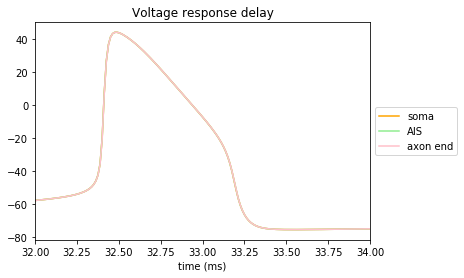

In [26]:
plt.plot(t_vec, v_vec,label="soma",color="orange")
plt.plot(t_vec, v_vec_AIS,label="AIS",color="lightgreen")
plt.plot(t_vec, v_vec_axEnd,label="axon end",color="pink")
plt.xlabel('time (ms)')
plt.title('Voltage response delay')
#plt.ylabel('Voltage (mV)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(32,34)
plt.savefig("graphs/light/Chronos_somaAx/Neuron_response/voltage_response_delay.png",bbox_inches='tight')

In [133]:
light_delay=freq
pulse_width=10
In=[]
for t in t_vec:
    aux=0.
    for i in range(0,n,1):
        if ( t >= (light_delay*i) and t <=(light_delay*i + pulse_width) ):
            aux=20.
    In.append(aux)
    

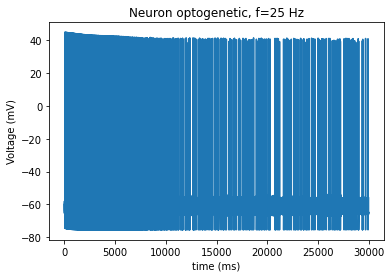

In [7]:
plt.plot(t_vec, v_vec)
#plt.plot(t_vec, In)
plt.xlabel('time (ms)')
plt.title('Neuron optogenetic, f=25 Hz')
plt.ylabel('Voltage (mV)')
#plt.xlim(0,1000)
#plt.legend(('out (mV)', 'In (mW/mm^2)'),loc="upper right")
#plt.savefig("graphs/light/Chronos_somaAx/Neuron_response/soma_long_out.png",bbox_inches='tight')
plt.show()

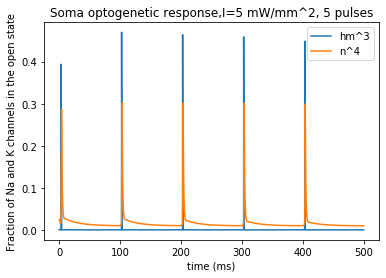

In [12]:
plt.plot(t_vec, m_som * m_som * m_som * h_som , t_vec, n_som * n_som * n_som * n_som)
#plt.plot(t_vec, m_AIS * m_AIS * m_AIS * h_AIS , t_vec, n_AIS * n_AIS * n_AIS * n_AIS)
plt.xlabel('time (ms)')
plt.title('Soma optogenetic response,I=5 mW/mm^2, 5 pulses')
plt.ylabel('Fraction of Na and K channels in the open state')
plt.legend(('hm^3', 'n^4'),loc="best")
#plt.xlim(0,100)
#plt.show()
plt.savefig("graphs/light/soma/frac_channel_soma.png",bbox_inches='tight')

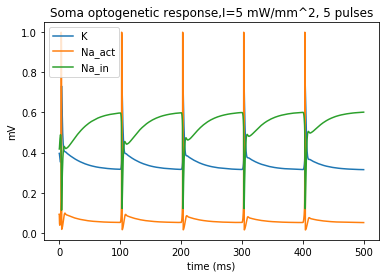

In [13]:
plt.plot(t_vec, n_som)
plt.plot(t_vec, m_som)
plt.plot(t_vec, h_som)
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.title('Soma optogenetic response,I=5 mW/mm^2, 5 pulses')
plt.legend(('K', 'Na_act', 'Na_in'))
#plt.xlim(0,100)
#plt.show()
plt.savefig("graphs/light/soma/channel_soma.png",bbox_inches='tight')

In [47]:
s_soma_1=np.array(s_som).tolist()
t_soma_1=np.array(t_vec).tolist()

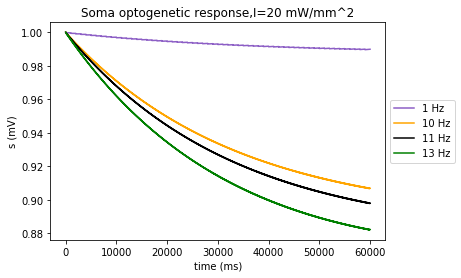

In [55]:
plt.plot(t_soma_1,s_soma_1,color='#8c5ec5', label="1 Hz")
plt.plot(t_soma_10,s_soma_10,color='orange', label="10 Hz")
plt.plot(t_soma_11,s_soma_11,color='black', label="11 Hz")
plt.plot(t_soma_13,s_soma_13,color='green', label="13 Hz")

plt.xlabel('time (ms)')
plt.ylabel('s (mV)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Soma optogenetic response,I=20 mW/mm^2')
plt.savefig("graphs/light/soma/latency_ChR2/ChR2_s_f.png",bbox_inches='tight')

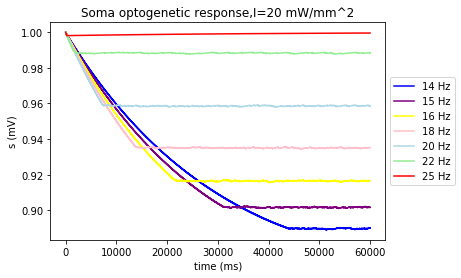

In [56]:

plt.plot(t_soma_14,s_soma_14,color='blue', label="14 Hz")
plt.plot(t_soma_15,s_soma_15,color='purple', label="15 Hz")
plt.plot(t_soma_16,s_soma_16,color='yellow', label="16 Hz")
plt.plot(t_soma_18,s_soma_18,color='pink', label="18 Hz")
plt.plot(t_soma_20,s_soma_20,color='lightblue', label="20 Hz")
plt.plot(t_soma_22,s_soma_22,color='lightgreen', label="22 Hz")
plt.plot(t_soma_25,s_soma_25,color='red', label="25 Hz")


plt.ylabel('s (mV)')
plt.xlabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Soma optogenetic response,I=20 mW/mm^2')
#plt.legend(('O1_som',"g", 'O2_som', 'C1_som'))
#plt.xlim(0,600)
#plt.ylim(0,0.3)
#plt.show()
plt.savefig("graphs/light/soma/latency_ChR2/ChR2_s_f_1.png",bbox_inches='tight')

In [7]:
O2_soma_10=np.array(O2_som).tolist()
O1_soma_10=np.array(O1_som).tolist()
C1_soma_10=np.array(C1_som).tolist()
t_soma_10=np.array(t_vec).tolist()

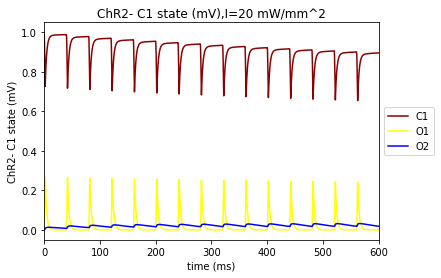

In [8]:
plt.plot(t_soma_10, C1_soma_10, color='darkred', label="C1")
plt.plot(t_soma_10, O1_soma_10, color='yellow', label="O1")
plt.plot(t_soma_10, O2_soma_10, color='blue', label="O2")
plt.xlabel('time (ms)')
plt.ylabel('ChR2- C1 state (mV)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ChR2- C1 state (mV),I=20 mW/mm^2')
plt.xlim(0,600)
plt.show()

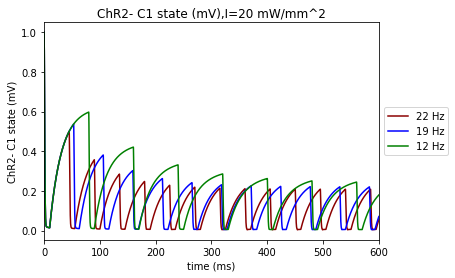

In [129]:
#plt.plot(t_soma_40,C1_soma_40,color='green', label="40 Hz)
#plt.plot(t_soma_30, C1_soma_30, color='#EE82EE', label="30 Hz")

plt.plot(t_soma_22, C1_soma_22, color='darkred', label="22 Hz")
#plt.plot(t_soma_20,C1_soma_20,color='lightgreen', label="20 Hz")
plt.plot(t_soma_19,C1_soma_19,color='blue', label="19 Hz")
#plt.plot(t_soma_16, C1_soma_16,color='pink', label="16 Hz")
plt.plot(t_soma_12, C1_soma_12,color='green', label="12 Hz")
plt.xlabel('time (ms)')
plt.ylabel('ChR2- C1 state (mV)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ChR2- C1 state (mV),I=20 mW/mm^2')
#plt.legend(('O1_som',"g", 'O2_som', 'C1_som'))
plt.xlim(0,600)
#plt.ylim(0,0.3)
#plt.show()
plt.savefig("graphs/light/soma/latency_ChR2/ChR2_C1_f.png",bbox_inches='tight')

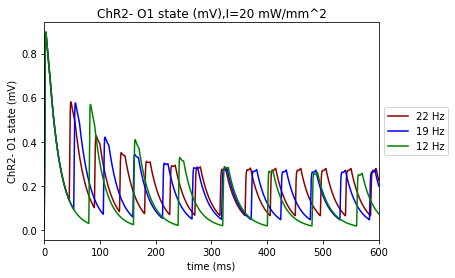

In [123]:
plt.plot(t_soma_22, O1_soma_22, color='darkred', label="22 Hz")
#plt.plot(t_soma_20,O1_soma_20,color='lightgreen', label="20 Hz")
plt.plot(t_soma_19,O1_soma_19,color='blue', label="19 Hz")
#plt.plot(t_soma_16,O1_soma_16,color='pink', label="16 Hz")
plt.plot(t_soma_12, O1_soma_12,color='green', label="12 Hz")

plt.xlabel('time (ms)')
plt.ylabel('ChR2- O1 state (mV)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ChR2- O1 state (mV),I=20 mW/mm^2')
#plt.legend(('O1_som',"g", 'O2_som', 'C1_som'))
plt.xlim(0,600)
#plt.ylim(0,0.3)
#plt.show()
plt.savefig("graphs/light/soma/latency_ChR2/ChR2_O1_f.png",bbox_inches='tight')

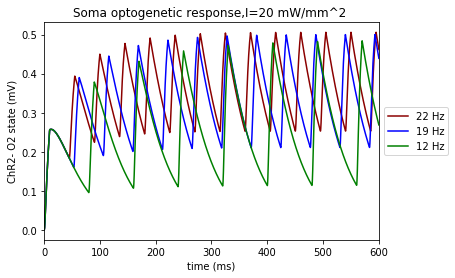

In [127]:
plt.plot(t_soma_22, O2_soma_22, color='darkred', label="22 Hz")
#plt.plot(t_soma_20,O2_soma_20,color='lightgreen', label="20 Hz")
plt.plot(t_soma_19,O2_soma_19,color='blue', label="19 Hz")
#plt.plot(t_soma_16,O2_soma_16,color='pink', label="16 Hz")
plt.plot(t_soma_12, O2_soma_12,color='green', label="12 Hz")

plt.xlabel('time (ms)')
plt.ylabel('ChR2- O2 state (mV)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Soma optogenetic response,I=20 mW/mm^2 ')
#plt.legend(('O1_som',"g", 'O2_som', 'C1_som'))
plt.xlim(0,600)
#plt.ylim(0,0.3)
#plt.show()
plt.savefig("graphs/light/soma/latency_ChR2/ChR2_O2_f.png",bbox_inches='tight')

### Latency

In [8]:
def Latency(v_vec,t_vec,n,int_time):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    t_out=[]
    lat=[]
    t_lat=[]
    for i in range(0,n):
        indx1=np.where(t > i*int_time)[0][0]
        indx2=np.where(t <(i*int_time+int_time))[0][-1]
        aux=max(v[indx1:indx2])
        if(aux>5):
            aux_t=int(t1[v.index(aux)]/int_time)*int_time
            lat.append(t1[v.index(aux)]-aux_t)
            t_lat.append(aux_t/1000)
    return lat,t_lat

In [9]:
#lat_soma,t_lat_soma=Latency(v_vec,t_vec,n,freq)
lat_soma_2,t_lat_soma_2=Latency(v_vec,t_vec,n,int_time)
'''lat_AIS,t_lat_AIS=Latency(v_vec_AIS,t_vec,n,freq)
lat_ax1,t_lat_ax1=Latency(v_vec_ax1,t_vec,n,freq)
lat_ax2,t_lat_ax2=Latency(v_vec_ax2,t_vec,n,freq)
lat_ax3,t_lat_ax3=Latency(v_vec_ax3,t_vec,n,freq)
lat_ax4,t_lat_ax4=Latency(v_vec_ax4,t_vec,n,freq)
lat_ax,t_lat_ax=Latency(v_vec_axEnd,t_vec,n,freq)
lat_axM,t_lat_axM=Latency(v_vec_axM,t_vec,n,freq)'''


'lat_AIS,t_lat_AIS=Latency(v_vec_AIS,t_vec,n,freq)\nlat_ax1,t_lat_ax1=Latency(v_vec_ax1,t_vec,n,freq)\nlat_ax2,t_lat_ax2=Latency(v_vec_ax2,t_vec,n,freq)\nlat_ax3,t_lat_ax3=Latency(v_vec_ax3,t_vec,n,freq)\nlat_ax4,t_lat_ax4=Latency(v_vec_ax4,t_vec,n,freq)\nlat_ax,t_lat_ax=Latency(v_vec_axEnd,t_vec,n,freq)\nlat_axM,t_lat_axM=Latency(v_vec_axM,t_vec,n,freq)'

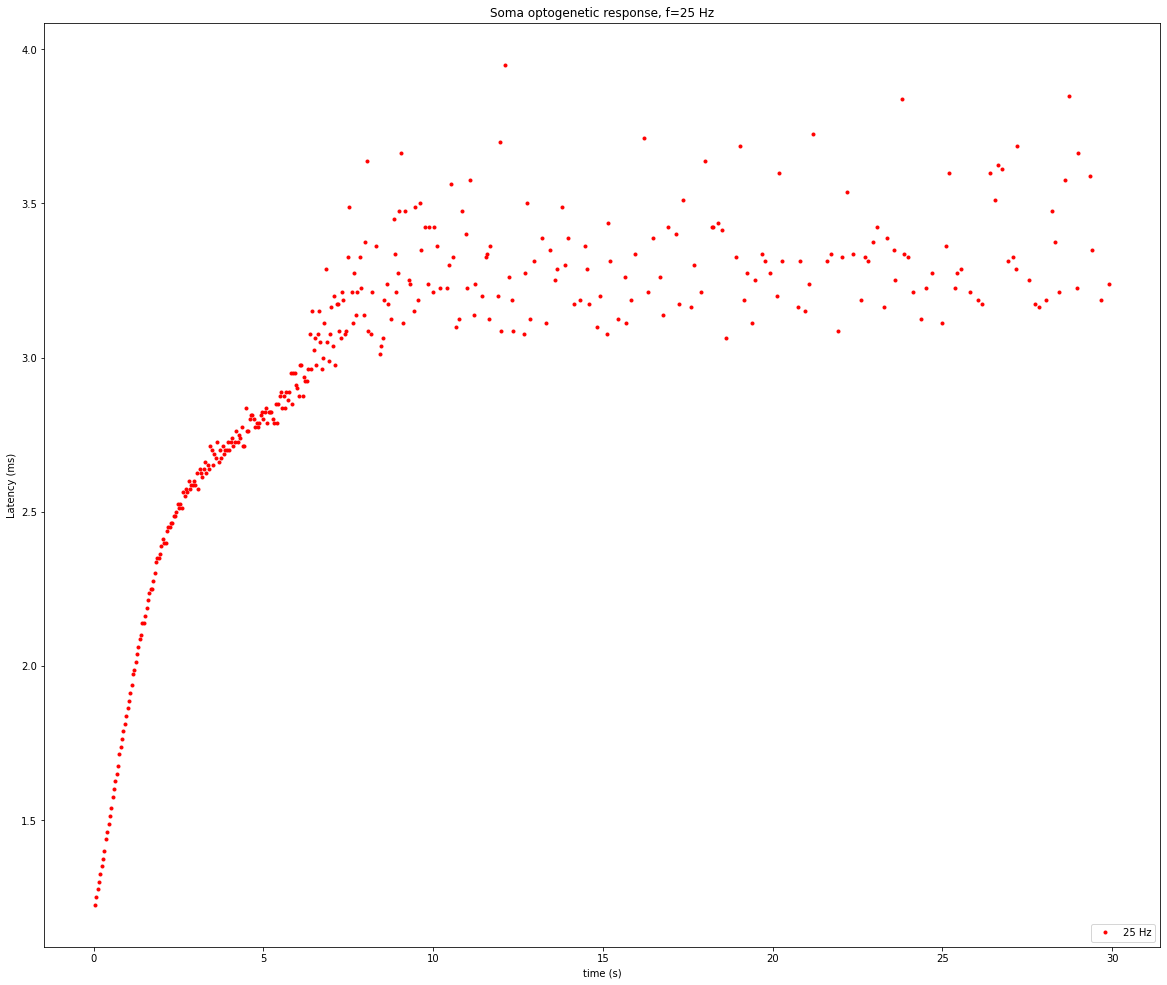

In [10]:
plt.figure(figsize=(20,17))
#plt.plot(t_lat_25, lat_25, '.', color='red', label="40 Hz")
#plt.plot(t_lat_33, lat_33, '.', color='darkred', label="33 Hz")
#plt.plot(t_lat_soma, lat_soma, '.', color='blue', label="2 s")
plt.plot(t_lat_soma_2, lat_soma_2, '.', color='red', label="25 Hz")
plt.xlabel('time (s)')
plt.ylabel('Latency (ms)')
plt.title('Soma optogenetic response, f=25 Hz')
plt.legend(loc='lower right')
#plt.xlim(0,1)
#plt.ylim(0,3.5)
#plt.savefig("graphs/light/Chronos_somaAx/Neuron_response/Latency_dt8.png")